In [1]:
import sys
import os
import pandas

project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
from src.preprocessing import load_and_process_phone_data, estimate_delay_cross_correlation, sync_and_plot_phones, butter_filter, sync_phones_only, calculate_delay_table


# Older Adults

Participants: 
1. ann         11. dov       21. miryam     31. tami
2. anna        12. ester     22. mordehai   32. tina
3. ann-m       13. fabian    23. moshe      33. tova
4. arie        14. gidon     24. naftali    34. uri
5. avraham     15. gita      25. naomi      35. yaacov
6. bat-sheva   16. ilana     26. rahel      36. yaacov_e
7. batya       17. inez      27. raya       37. yaffa
8. benny       18. mazal     28. ronald     38. yossef
9. david       19. meir      29. shalom     39. yossi
10. dida       20. michael   30. shalom_l   40. yudit

In [3]:
participant_name = 'ann'


Participant: ann | Trial: eyes_open1


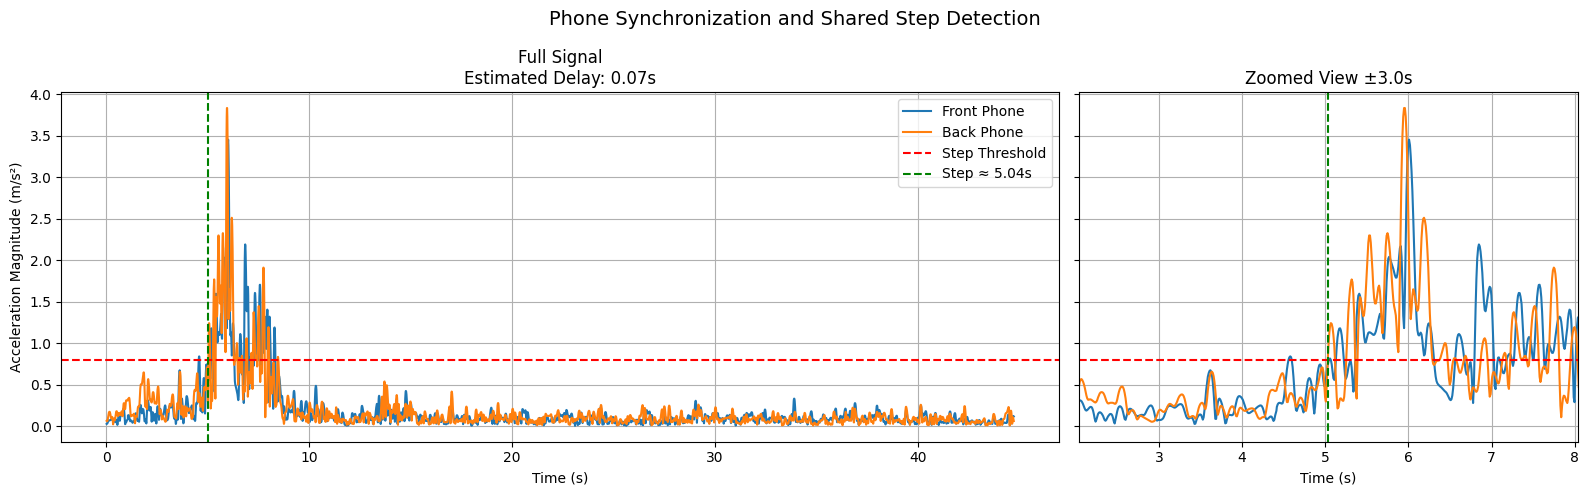

✅ Estimated delay between phones: 0.07 seconds
📍 Detected shared step time: 5.04 seconds

Participant: ann | Trial: eyes_open2


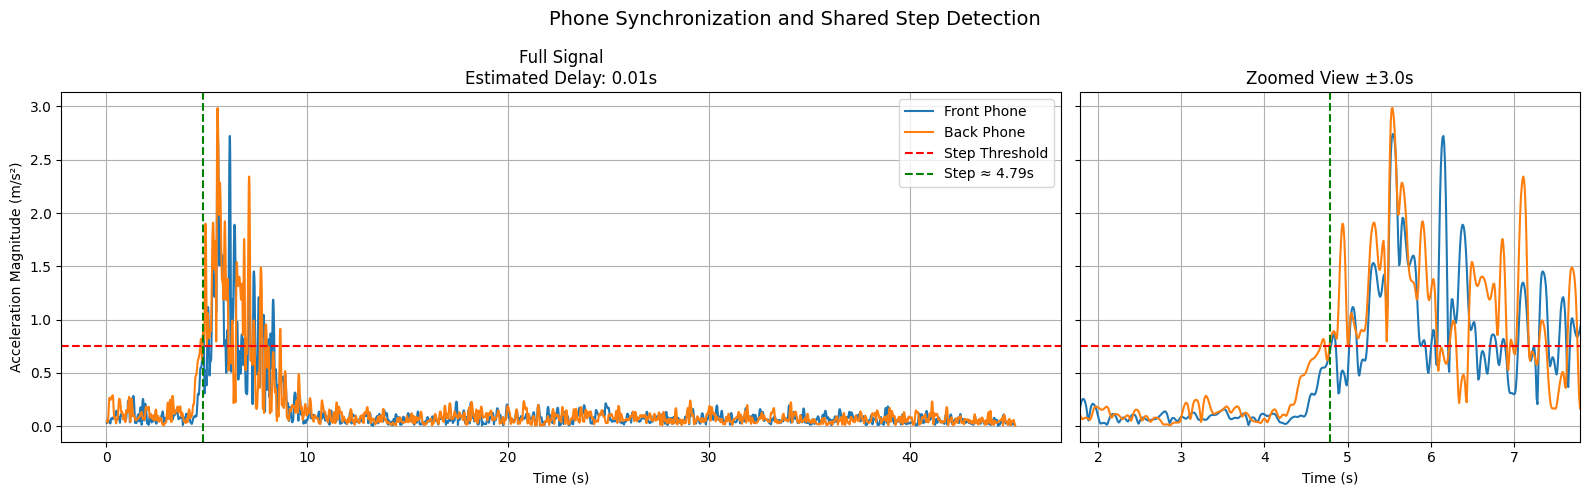

✅ Estimated delay between phones: 0.01 seconds
📍 Detected shared step time: 4.79 seconds

Participant: ann | Trial: eyes_open3


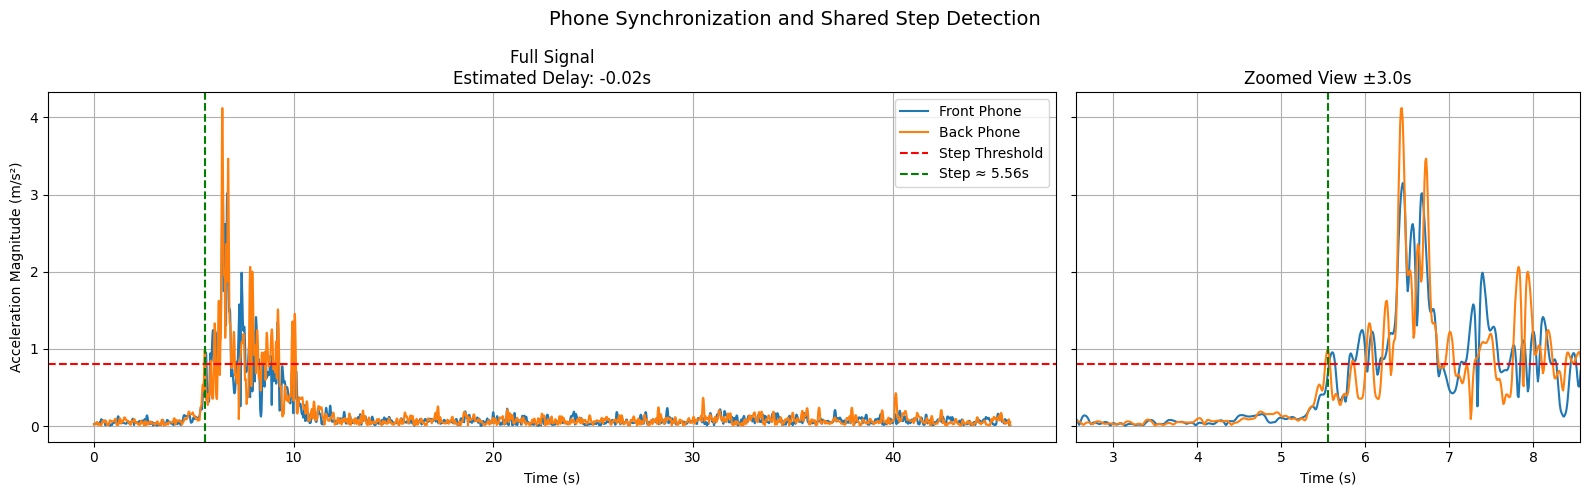

✅ Estimated delay between phones: -0.02 seconds
📍 Detected shared step time: 5.56 seconds

Participant: ann | Trial: eyes_open4


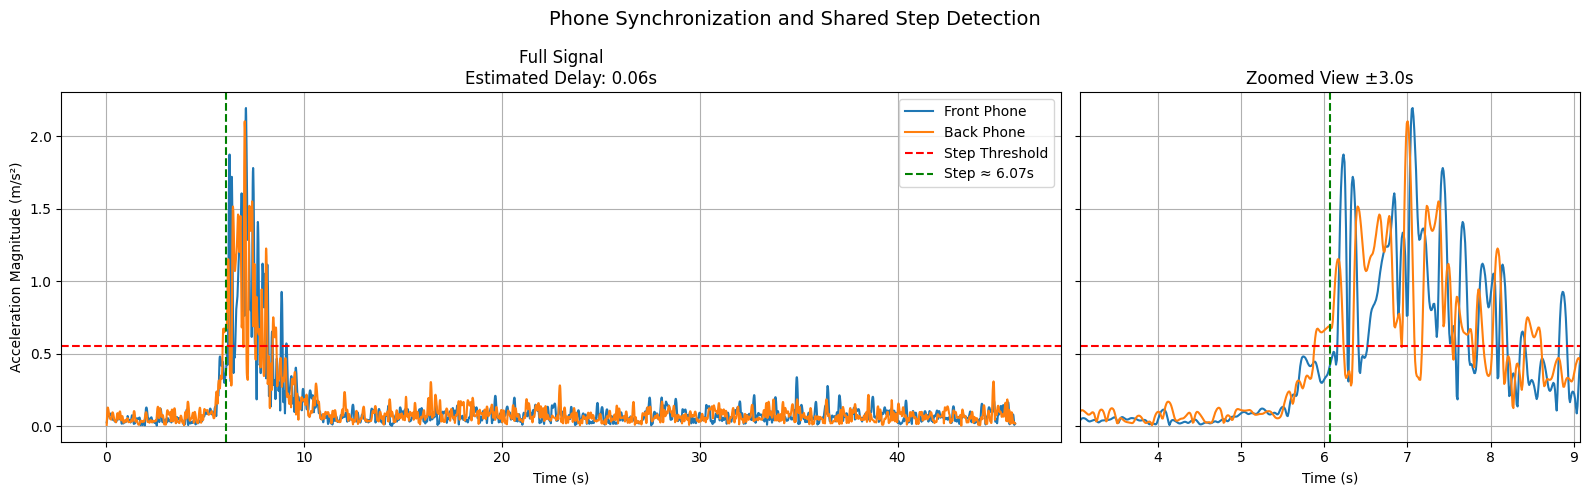

✅ Estimated delay between phones: 0.06 seconds
📍 Detected shared step time: 6.07 seconds

Participant: ann | Trial: eyes_open5


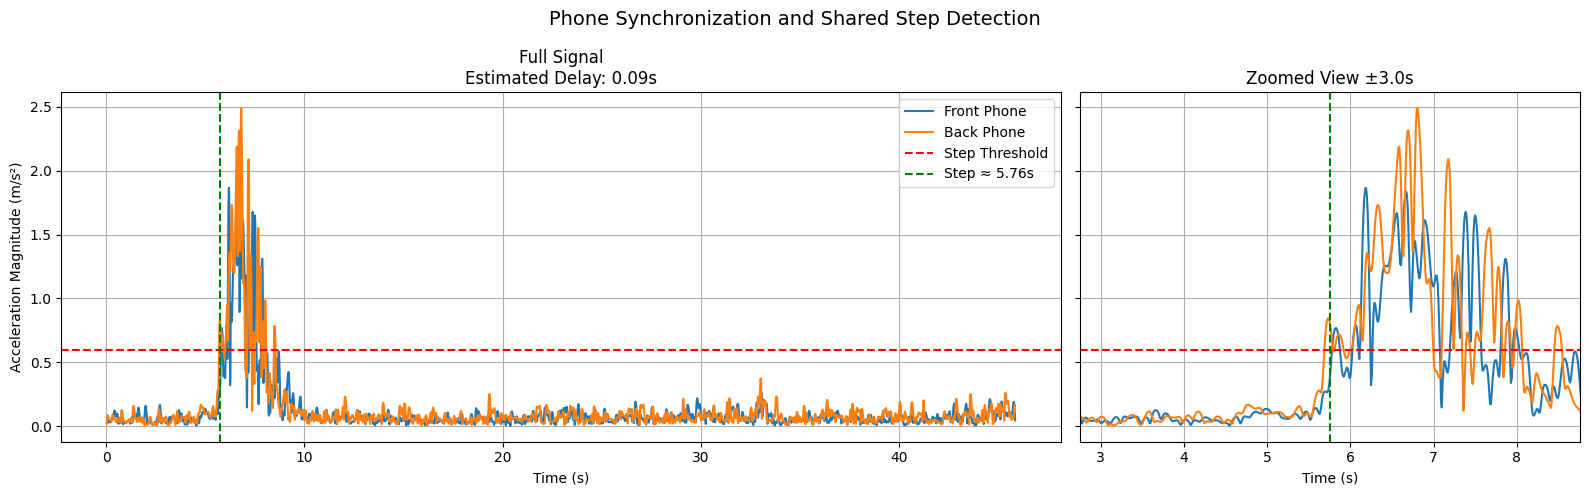

✅ Estimated delay between phones: 0.09 seconds
📍 Detected shared step time: 5.76 seconds


In [4]:
for index in range(1, 6):
    print(f"\nParticipant: {participant_name} | Trial: eyes_open{index}")

    # Build paths to front and back phone data
    front_path = os.path.join(
        "..", "..", "data", "raw", "older_adults",
        participant_name, f"{participant_name}_front_phone",
        f"{participant_name}_eyes_open{index}.csv"
    )

    back_path = os.path.join(
        "..", "..", "data", "raw", "older_adults",
        participant_name, f"{participant_name}_back_phone",
        f"{participant_name}_eyes_open{index}.csv"
    )

    # Load and process both phones
    df_front = load_and_process_phone_data(front_path)
    df_back = load_and_process_phone_data(back_path)

    # Synchronize and plot shared trim point
    step_time, delay = sync_and_plot_phones(df_front, df_back)


Participant: ann | Trial: eyes_closed1


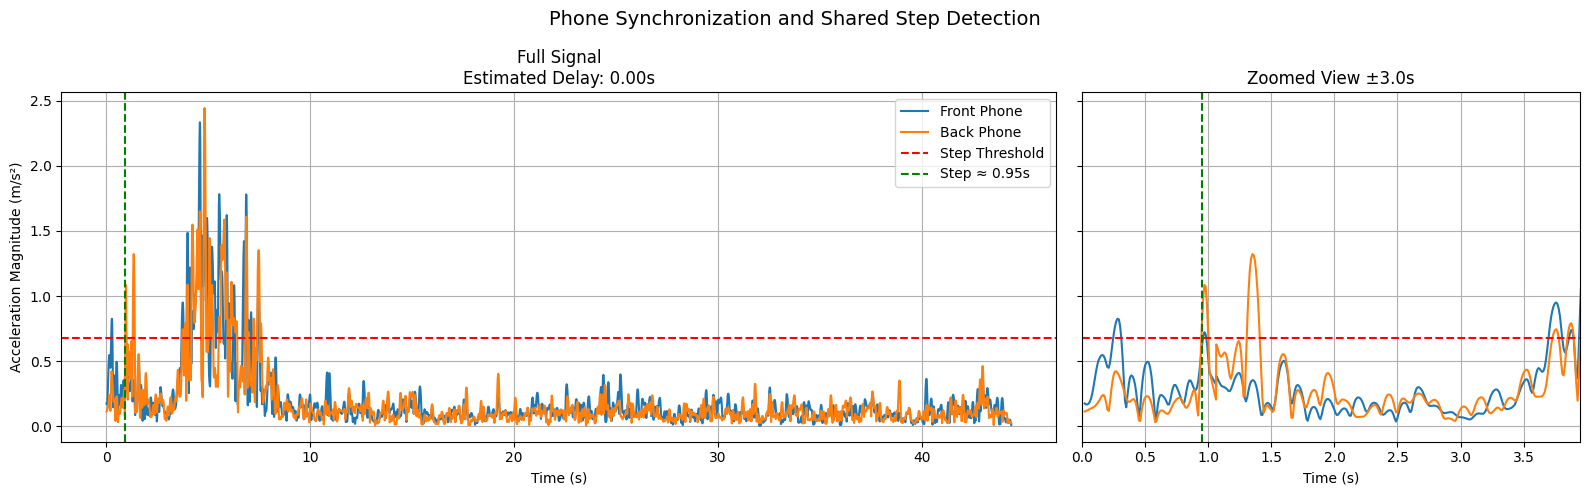

✅ Estimated delay between phones: 0.00 seconds
📍 Detected shared step time: 0.95 seconds

Participant: ann | Trial: eyes_closed2


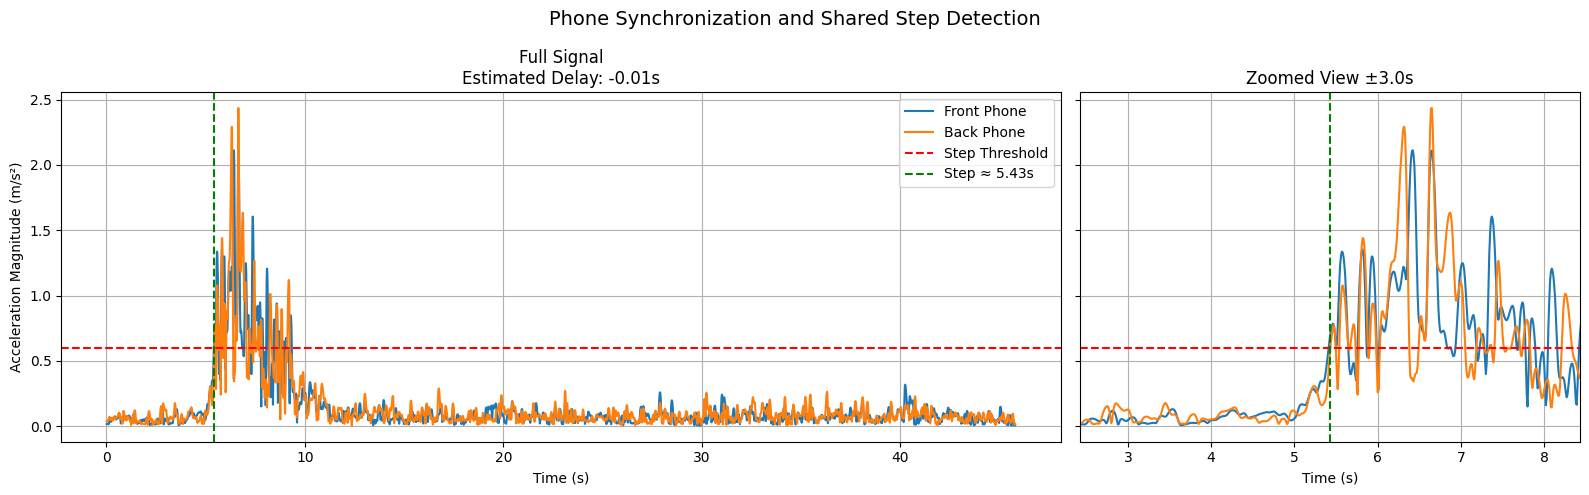

✅ Estimated delay between phones: -0.01 seconds
📍 Detected shared step time: 5.43 seconds

Participant: ann | Trial: eyes_closed3


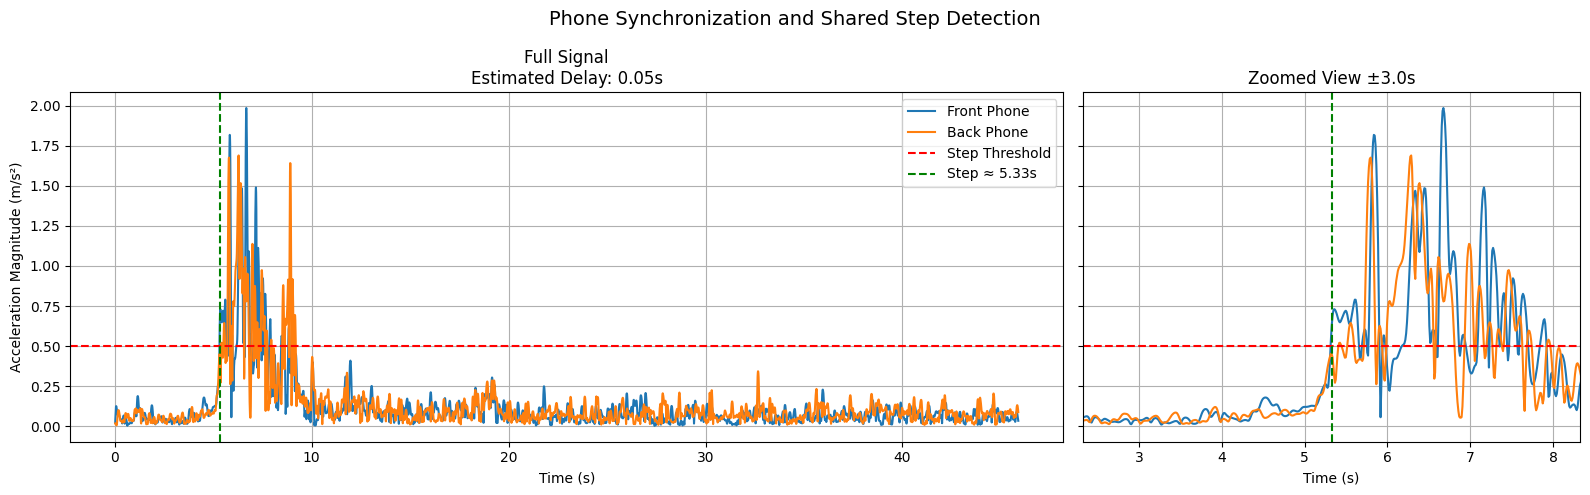

✅ Estimated delay between phones: 0.05 seconds
📍 Detected shared step time: 5.33 seconds

Participant: ann | Trial: eyes_closed4


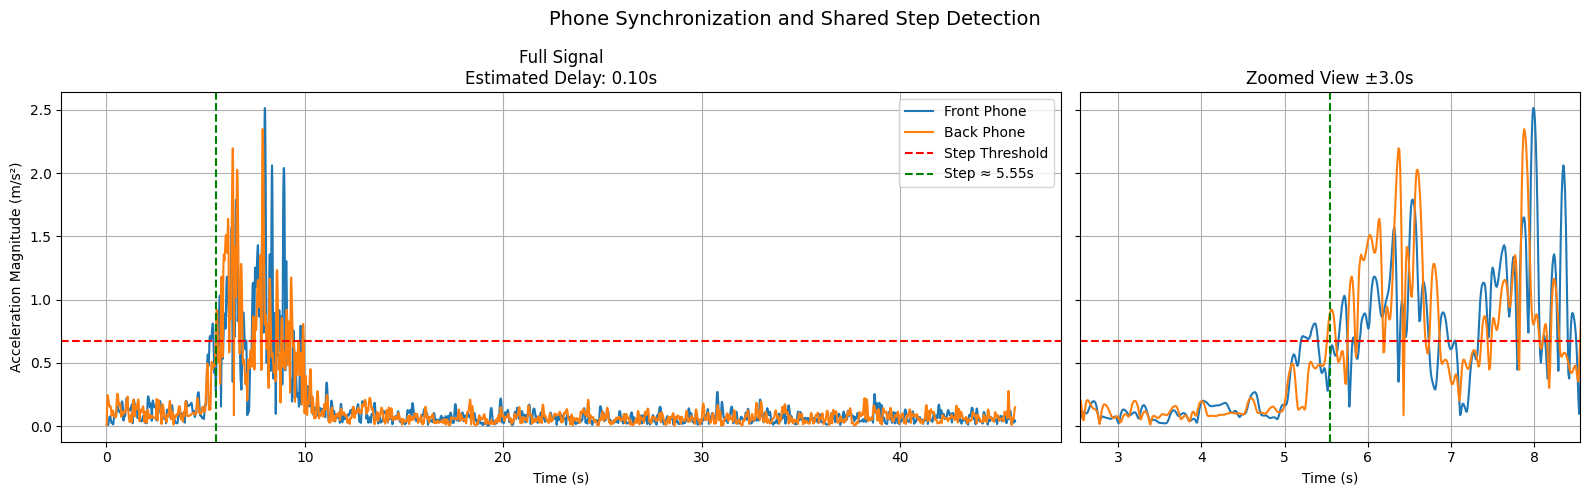

✅ Estimated delay between phones: 0.10 seconds
📍 Detected shared step time: 5.55 seconds

Participant: ann | Trial: eyes_closed5


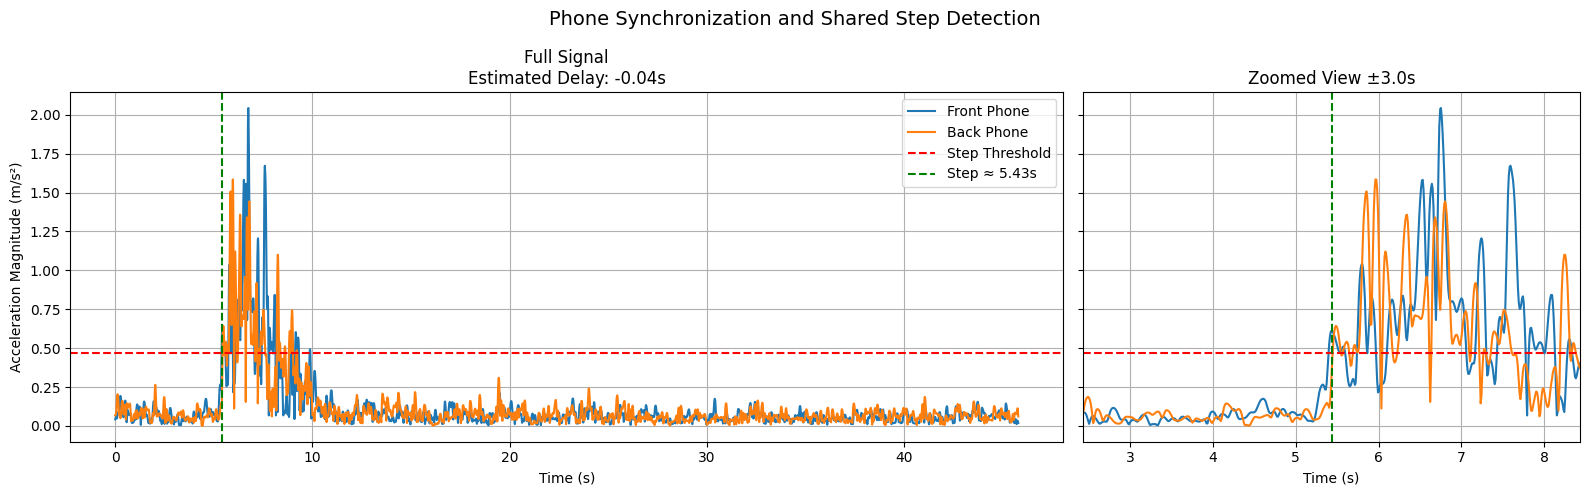

✅ Estimated delay between phones: -0.04 seconds
📍 Detected shared step time: 5.43 seconds


In [5]:
for index in range(1, 6):
    print(f"\nParticipant: {participant_name} | Trial: eyes_closed{index}")

    # Build paths to front and back phone data
    front_path = os.path.join(
        "..", "..", "data", "raw", "older_adults",
        participant_name, f"{participant_name}_front_phone",
        f"{participant_name}_eyes_closed{index}.csv"
    )

    back_path = os.path.join(
        "..", "..", "data", "raw", "older_adults",
        participant_name, f"{participant_name}_back_phone",
        f"{participant_name}_eyes_closed{index}.csv"
    )

    # Load and process both phones
    df_front = load_and_process_phone_data(front_path)
    df_back = load_and_process_phone_data(back_path)

    # Synchronize and plot shared trim point
    step_time, delay = sync_and_plot_phones(df_front, df_back)

In [4]:
participants = [
    'ann', 'anna', 'ann-m', 'arie', 'bat-sheva', 'batya', 'benny', 'david', 'dida',
    'dov', 'ester', 'fabian', 'gidon', 'gita', 'ilana', 'inez', 'mazal', 'meir', 'michael',
    'miryam', 'mordehai', 'moshe', 'naftali', 'naomi', 'rahel', 'raya', 'ronald', 'shalom', 'shalom_l',
    'tami', 'tina', 'tova', 'uri', 'yaacov', 'yaacov_e', 'yaffa', 'yossef', 'yossi'
]

older_adults_delay = calculate_delay_table(group="older_adults", participants=participants)
older_adults_delay

c:\fall_risk_analysis\myenv\lib\site-packages\scipy\signal\_signaltools.py:265: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  return convolve(in1, _reverse_and_conj(in2), mode, method)


,open1,open2,open3,open4,open5,closed1,closed2,closed3,closed4,closed5
ann,0.07,0.01,-0.02,0.06,0.09,0.0,-0.01,0.05,0.1,-0.04
anna,-0.03,0.13,-0.02,-0.07,-0.05,-0.05,-0.17,-0.04,-0.06,3.0
ann-m,0.01,-0.1,-0.08,-0.07,0.06,0.1,-0.01,0.0,0.03,0.0
arie,-0.03,-0.44,0.0,0.05,0.04,-0.01,-0.02,0.05,-0.01,0.0
bat-sheva,0.0,0.49,0.79,0.03,0.26,0.06,0.27,-0.21,0.07,0.11
batya,0.11,-0.06,-0.22,-0.15,0.3,-0.09,-0.07,0.03,-3.0,-0.05
benny,-0.03,0.25,0.17,-0.12,-0.09,0.27,0.19,-0.14,-0.14,-0.09
david,-0.01,0.03,0.08,-0.1,-0.01,0.23,-0.02,0.01,0.09,0.01
dida,0.01,0.09,-0.15,-0.32,-1.43,-1.55,-0.01,-0.03,0.12,-0.05
dov,-0.07,-0.01,0.04,-0.4,0.0,-0.07,0.27,0.05,0.17,0.08


# Students

In [12]:
participant_id  = 1


Participant: 1 | Trial: eyes_open1


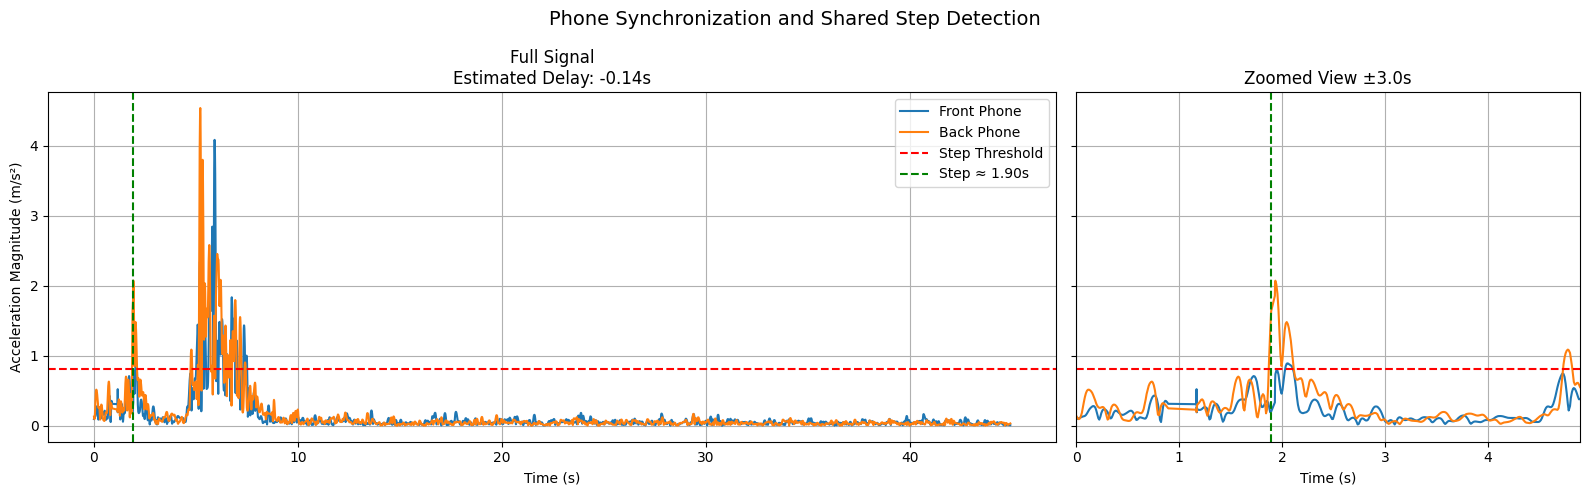

✅ Estimated delay between phones: -0.14 seconds
📍 Detected shared step time: 1.90 seconds

Participant: 1 | Trial: eyes_open2


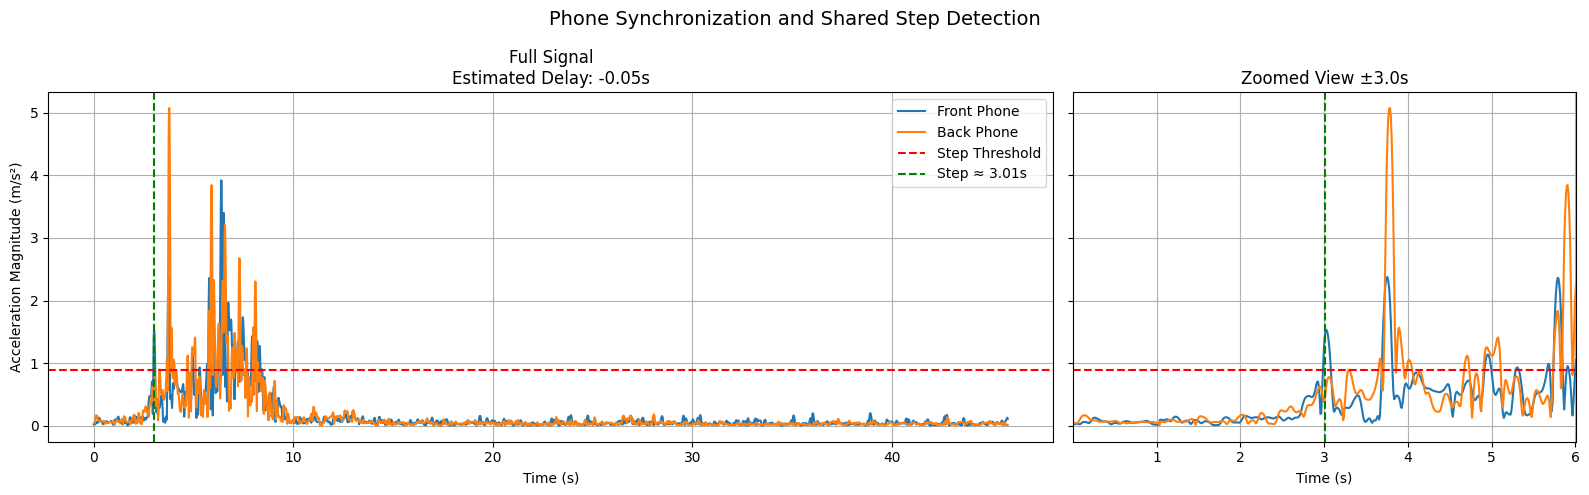

✅ Estimated delay between phones: -0.05 seconds
📍 Detected shared step time: 3.01 seconds

Participant: 1 | Trial: eyes_open3


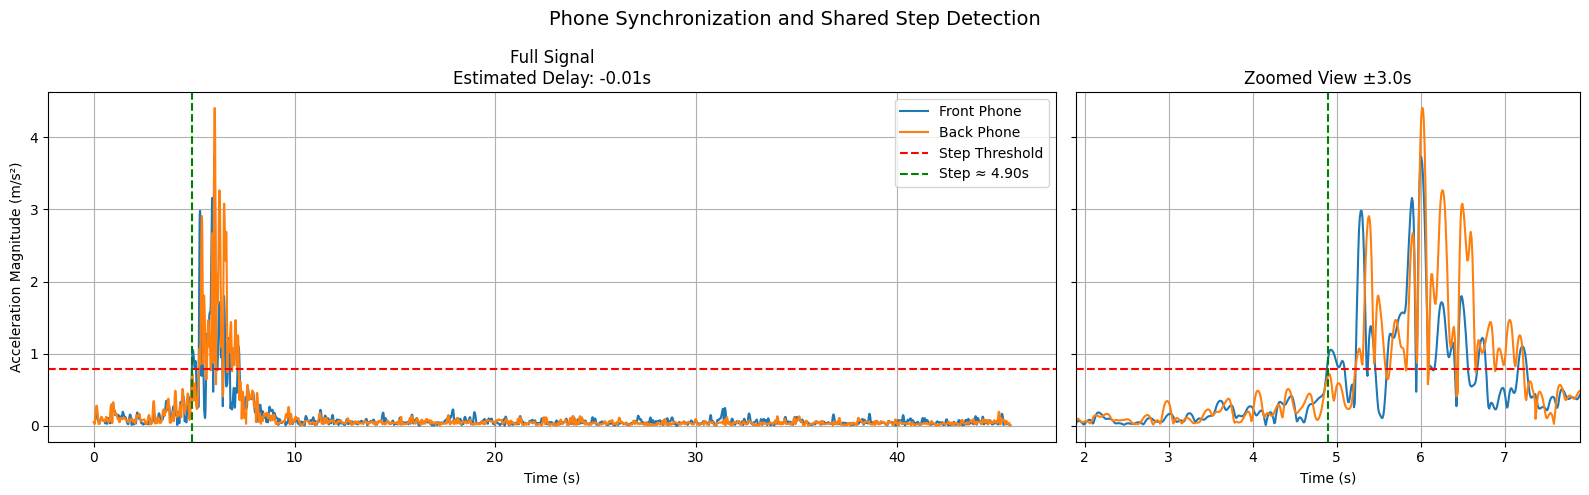

✅ Estimated delay between phones: -0.01 seconds
📍 Detected shared step time: 4.90 seconds

Participant: 1 | Trial: eyes_open4


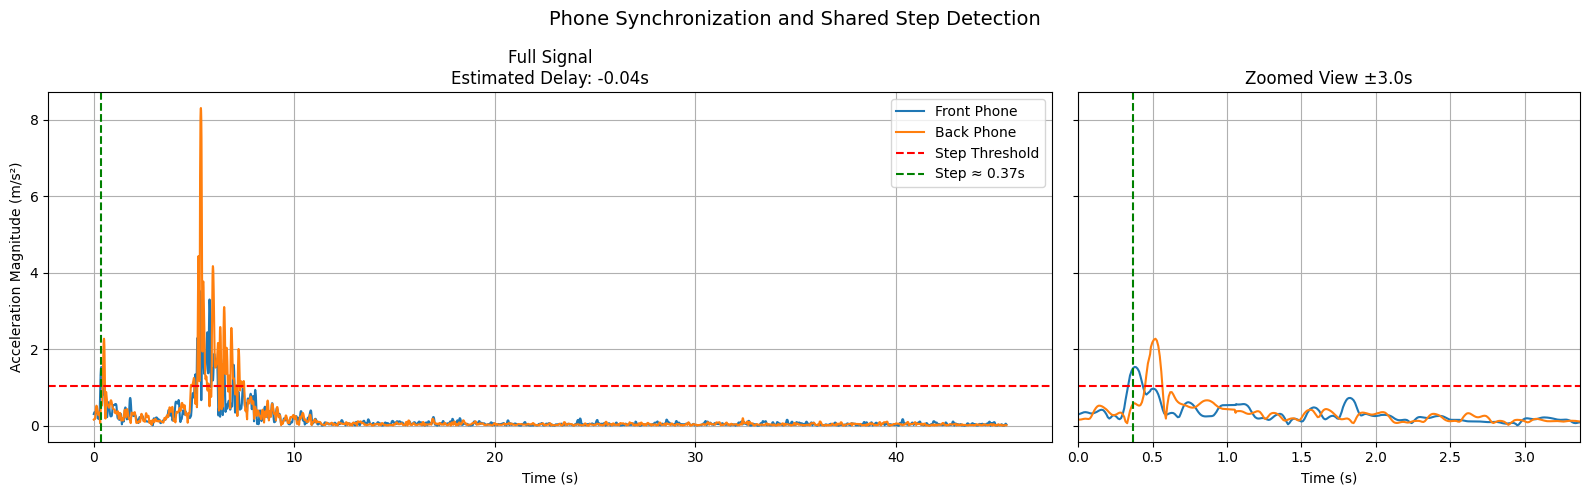

✅ Estimated delay between phones: -0.04 seconds
📍 Detected shared step time: 0.37 seconds

Participant: 1 | Trial: eyes_open5


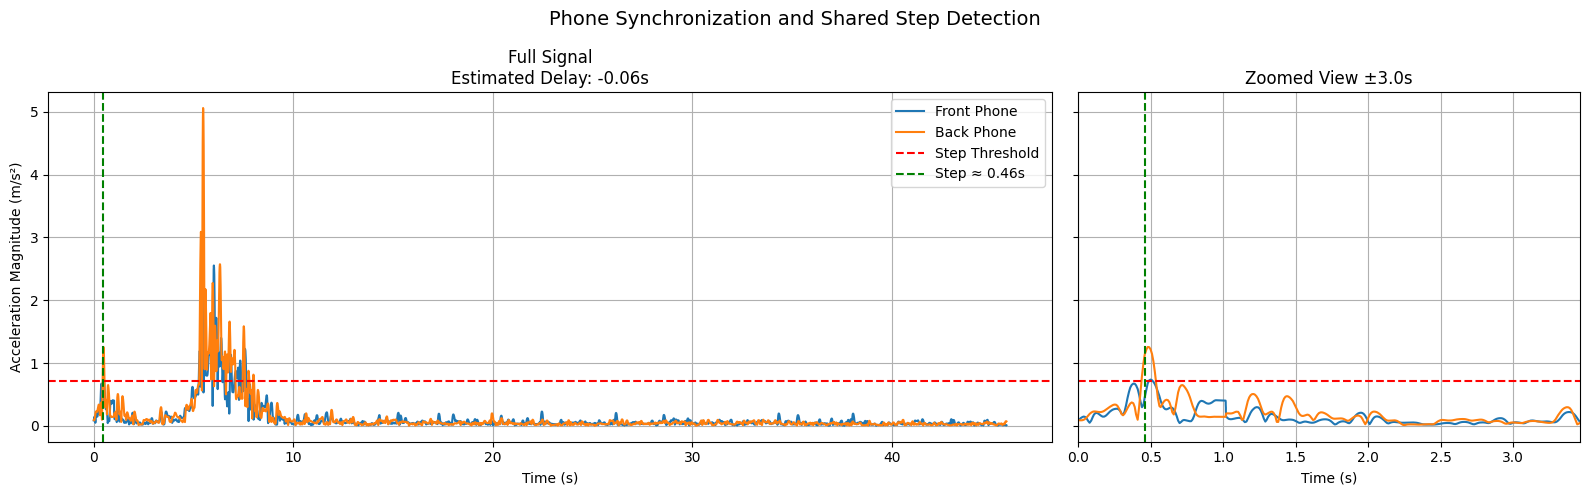

✅ Estimated delay between phones: -0.06 seconds
📍 Detected shared step time: 0.46 seconds


In [18]:
for index in range(1, 6):
    print(f"\nParticipant: {participant_id} | Trial: eyes_open{index}")

    # Build paths to front and back phone data
    front_path = os.path.join(
        "..", "..", "data", "raw", "students",
        str(participant_id), f"{participant_id}_front_phone",
        f"{participant_id}_eyes_open{index}.csv"
    )

    back_path = os.path.join(
        "..", "..", "data", "raw", "students",
        str(participant_id), f"{participant_id}_back_phone",
        f"{participant_id}_eyes_open{index}.csv"
    )

    # Load and process both phones
    df_front = load_and_process_phone_data(front_path)
    df_back = load_and_process_phone_data(back_path)

    # Synchronize and plot shared trim point
    step_time, delay = sync_and_plot_phones(df_front, df_back)


Participant: 1 | Trial: eyes_closed1


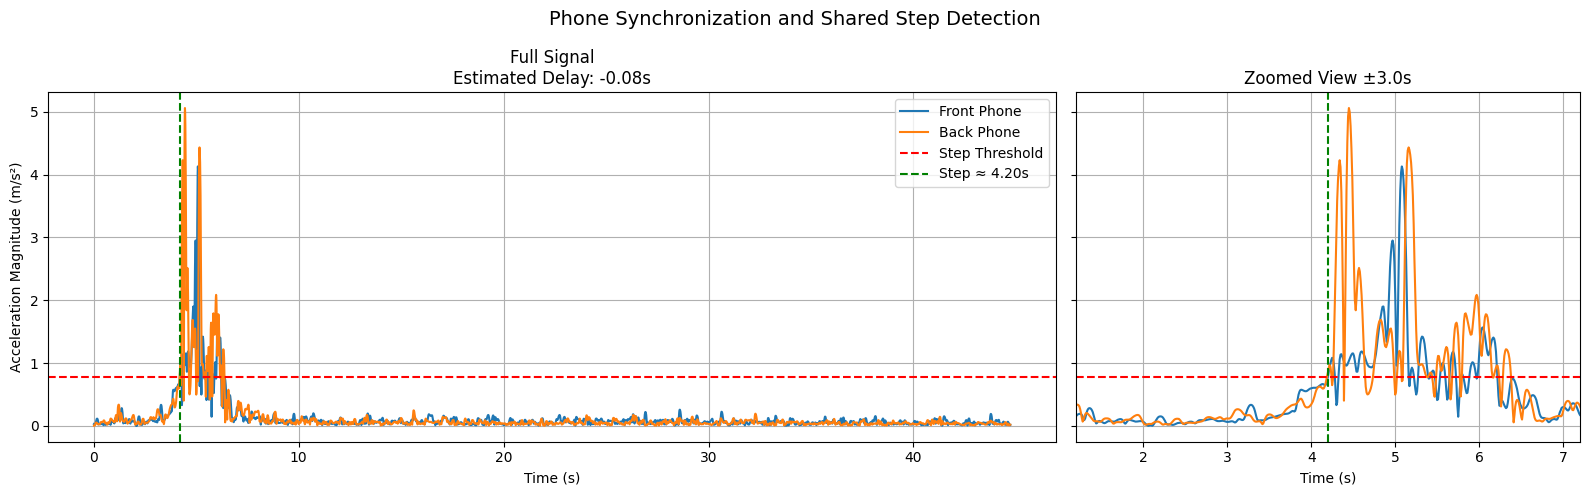

✅ Estimated delay between phones: -0.08 seconds
📍 Detected shared step time: 4.20 seconds

Participant: 1 | Trial: eyes_closed2


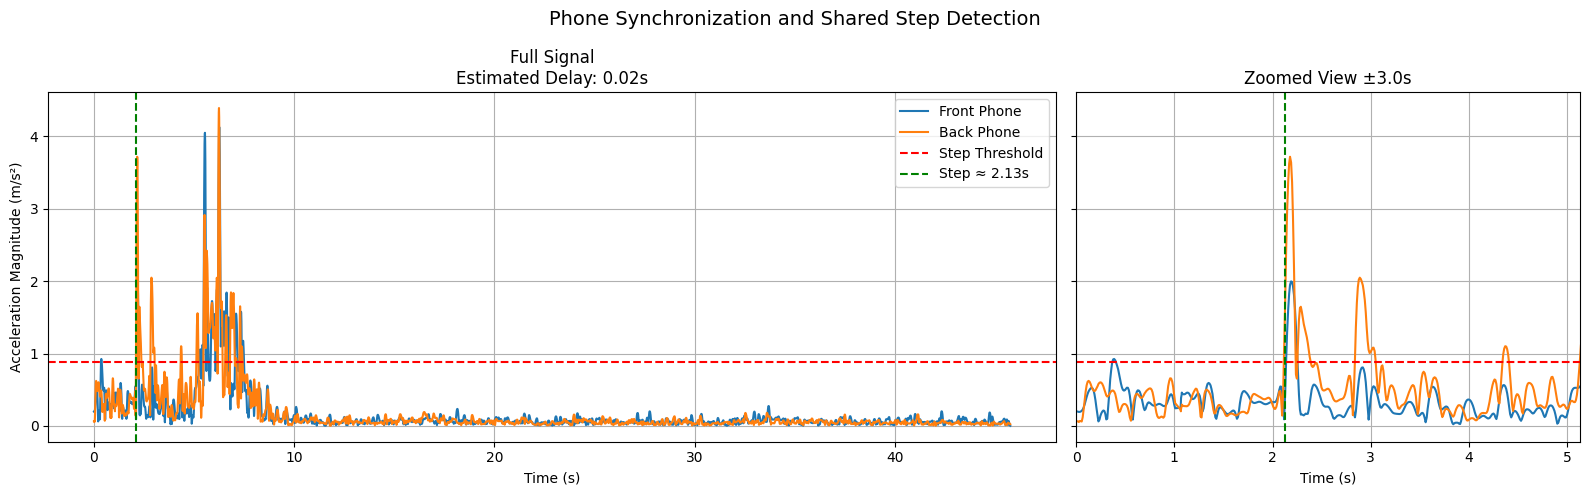

✅ Estimated delay between phones: 0.02 seconds
📍 Detected shared step time: 2.13 seconds

Participant: 1 | Trial: eyes_closed3


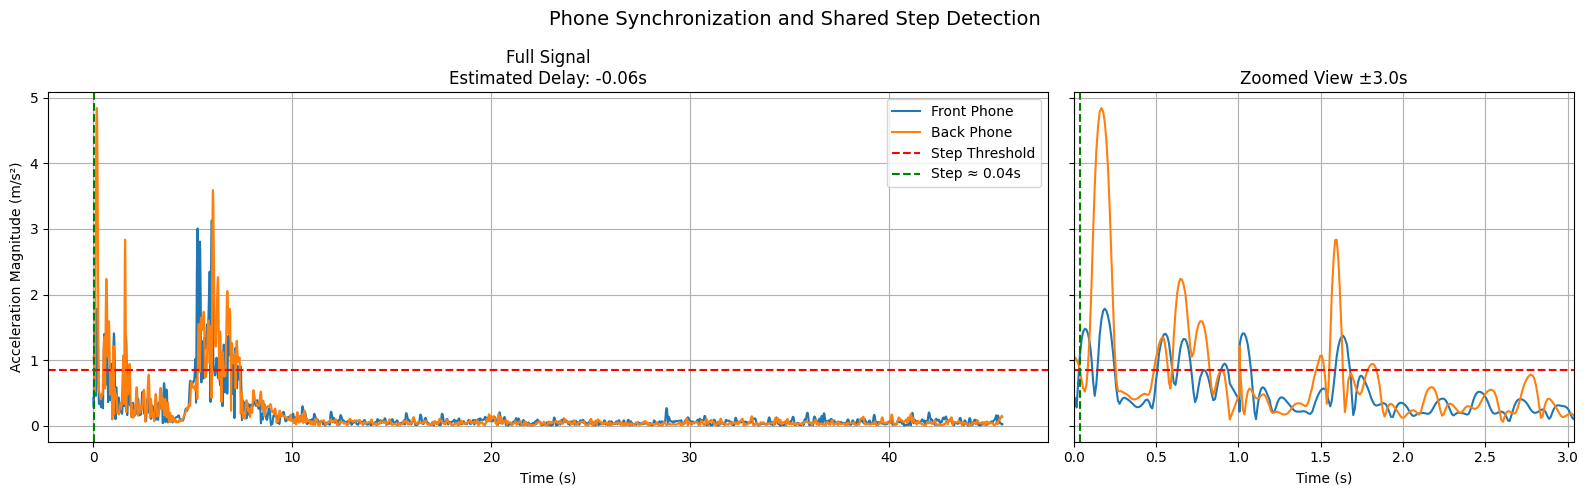

✅ Estimated delay between phones: -0.06 seconds
📍 Detected shared step time: 0.04 seconds

Participant: 1 | Trial: eyes_closed4


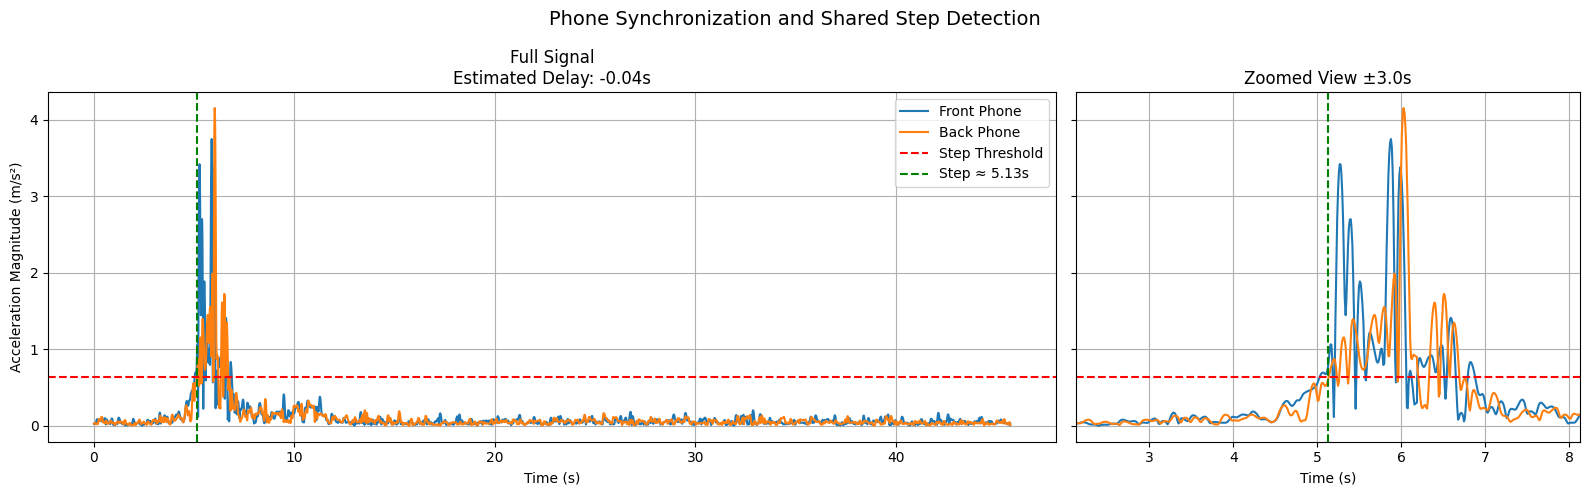

✅ Estimated delay between phones: -0.04 seconds
📍 Detected shared step time: 5.13 seconds

Participant: 1 | Trial: eyes_closed5


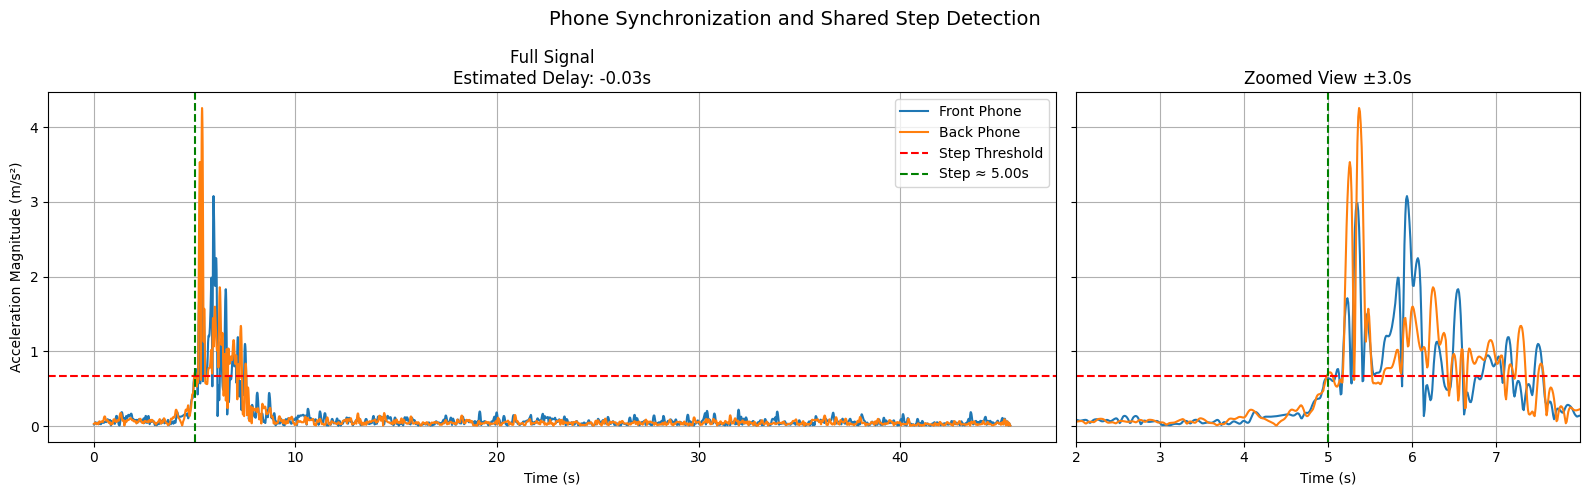

✅ Estimated delay between phones: -0.03 seconds
📍 Detected shared step time: 5.00 seconds


In [19]:
for index in range(1, 6):
    print(f"\nParticipant: {participant_id} | Trial: eyes_closed{index}")

    # Build paths to front and back phone data
    front_path = os.path.join(
        "..", "..", "data", "raw", "students",
        str(participant_id), f"{participant_id}_front_phone",
        f"{participant_id}_eyes_closed{index}.csv"
    )

    back_path = os.path.join(
        "..", "..", "data", "raw", "students",
        str(participant_id), f"{participant_id}_back_phone",
        f"{participant_id}_eyes_closed{index}.csv"
    )

    # Load and process both phones
    df_front = load_and_process_phone_data(front_path)
    df_back = load_and_process_phone_data(back_path)

    # Synchronize and plot shared trim point
    step_time, delay = sync_and_plot_phones(df_front, df_back)

In [7]:
participants = [str(i) for i in range(1,28)]

students_delay = calculate_delay_table(group="students", participants=participants)
students_delay

,open1,open2,open3,open4,open5,closed1,closed2,closed3,closed4,closed5
1,-0.14,-0.05,-0.01,-0.04,-0.06,-0.08,0.02,-0.06,-0.04,-0.03
2,0.12,0.12,0.02,0.13,-0.12,-0.03,0.0,-0.21,-0.01,0.05
3,0.07,0.03,0.0,-0.02,0.02,0.01,0.03,-0.39,-0.05,-0.11
4,0.09,0.02,0.2,-0.06,-0.02,0.04,-0.01,0.01,0.01,-0.11
5,0.0,0.11,0.03,0.03,-0.17,-0.04,-0.05,0.04,-0.01,-0.06
6,0.02,0.08,-0.22,0.0,-0.19,0.01,-0.13,-0.05,-0.07,-0.06
7,0.02,0.04,0.04,0.0,0.06,-0.12,0.01,0.09,0.29,0.04
8,-0.06,0.72,-0.06,0.01,0.0,-0.43,-0.07,-0.07,-0.01,0.01
9,0.06,0.0,-0.06,-0.07,0.04,0.0,-0.06,0.02,0.0,0.03
10,0.11,-0.12,-0.09,-0.01,0.0,0.14,-0.05,-0.5,-0.12,-0.01
